# S&P 500 Trading Algorithm

This notebook implements a trading algorithm for the S&P 500 using machine learning models. We will use available parameters as signals and build models like FFNN, LSTM, and CNN.

## Data Loading and Exploration

In [3]:
import pandas as pd
import numpy as np


# Load the CSV data
data = pd.read_csv("C:/Users/David/Documents/GitHub/Quantitative_Trading_Algorithm/output.csv")

# Print the columns to understand the data structure
print("Data Columns:")
print(data.columns)

# Based on the legend, we should map these columns to lowercase
selected_columns = [
    'emp', 'pe', 'cape', 'dy', 'rho', 'mov', 'ir', 'rr',
    'y02', 'y10', 'stp', 'cf', 'mg', 'rv', 'ed', 'un',
    'gdp', 'm2', 'cpi', 'dil', 'yss', 'nyf',
    '_au', '_dxy', '_lcp', '_ty', '_oil',
    '_mkt', '_va', '_gr'
]

# Check if the selected columns are in the data
available_columns = [col for col in selected_columns if col in data.columns]
print("Selected Available Columns:")
print(available_columns)

# Extracting the relevant columns
data = data[available_columns + ['snp']]  # Including 'snp' as target

Data Columns:
Index(['emp', 'pe', 'cape', 'dy', 'rho', 'mov', 'ir', 'rr', 'y02', 'y10',
       'stp', 'cf', 'mg', 'rv', 'ed', 'un', 'gdp', 'm2', 'cpi', 'dil', 'yss',
       'nyf', '_au', '_dxy', '_lcp', '_ty', '_oil', '_mkt', '_va', '_gr',
       'snp', 'date', 'year', 'month', 'day', 'label'],
      dtype='object')
Selected Available Columns:
['emp', 'pe', 'cape', 'dy', 'rho', 'mov', 'ir', 'rr', 'y02', 'y10', 'stp', 'cf', 'mg', 'rv', 'ed', 'un', 'gdp', 'm2', 'cpi', 'dil', 'yss', 'nyf', '_au', '_dxy', '_lcp', '_ty', '_oil', '_mkt', '_va', '_gr']


## Preprocess and Feature Engineering

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Handle missing values
data = data.dropna()

# Extract features and target
features = data.drop(columns=['snp'])
target = data['snp']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

print("Feature Engineering and Data Preprocessing Complete.")


Feature Engineering and Data Preprocessing Complete.


## Custom Train-Test Split for LSTM To Keep Data Sequential

In [5]:
# Custom function to split data for each year to keep the data sequential
def custom_train_test_split(features, target, train_size=42, test_size=10):
    X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []
    for start in range(0, len(features), train_size + test_size):
        end_train = start + train_size
        end_test = end_train + test_size
        if end_test <= len(features):
            X_train_list.append(features[start:end_train])
            y_train_list.append(target[start:end_train])
            X_test_list.append(features[end_train:end_test])
            y_test_list.append(target[end_train:end_test])
    
    X_train_lstm_prepared = np.concatenate(X_train_list)
    y_train_lstm_prepared = np.concatenate(y_train_list)
    X_test_lstm_prepared = np.concatenate(X_test_list)
    y_test_lstm_prepared = np.concatenate(y_test_list)
    
    return X_train_lstm_prepared, y_train_lstm_prepared, X_test_lstm_prepared, y_test_lstm_prepared

# Split the data using the custom function
X_train_lstm_prepared, y_train_lstm_prepared, X_test_lstm_prepared, y_test_lstm_prepared = custom_train_test_split(features_scaled, target)

# Reshape data for LSTM (needs 3D input)
X_train_lstm = X_train_lstm_prepared.reshape((X_train_lstm_prepared.shape[0], 1, X_train_lstm_prepared.shape[1]))
X_test_lstm = X_test_lstm_prepared.reshape((X_test_lstm_prepared.shape[0], 1, X_test_lstm_prepared.shape[1]))


## Model Implementation

### Feed-Forward Neural Network (FFNN)

Epoch 1/50


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3840940.5000 - val_loss: 3837534.5000
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3484986.2500 - val_loss: 3626350.5000
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3320952.7500 - val_loss: 2890997.5000
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2433453.5000 - val_loss: 1672164.1250
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1464017.2500 - val_loss: 657009.5000
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 593460.5625 - val_loss: 262382.5312
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 304971.7500 - val_loss: 170951.3438
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 264263.4062 - val_loss: 128508.6094
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 212965.4688 - val_loss: 104770.3125
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 193508.7031 - val_loss: 87224.0938
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 179

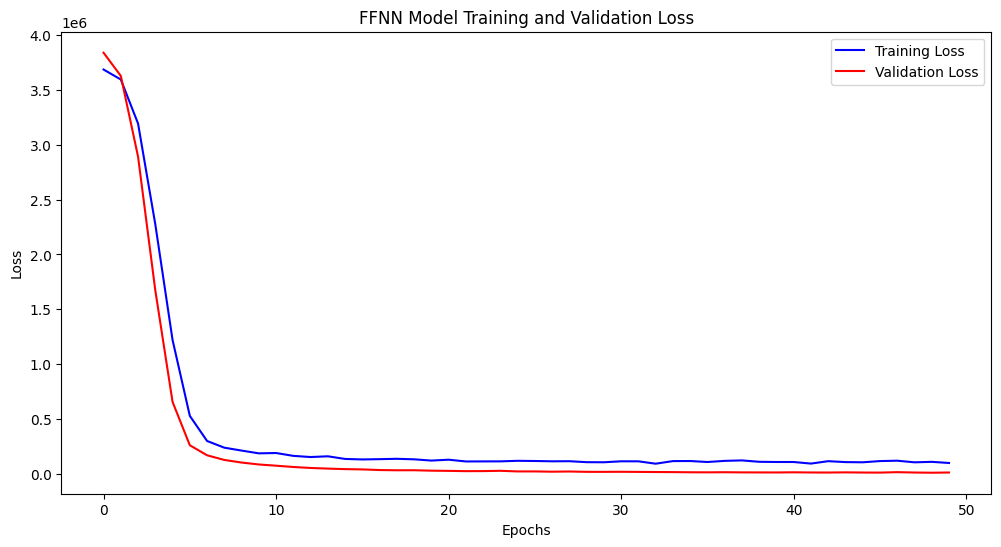

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the FFNN model creation function
def create_ffnn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Training with all parameters
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

ffnn_model = create_ffnn_model(X_train_scaled.shape[1])
ffnn_history = ffnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

ffnn_evaluation = ffnn_model.evaluate(X_test_scaled, y_test)
print(f"FFNN Model Test Loss: {ffnn_evaluation}")

ffnn_predictions = ffnn_model.predict(X_test_scaled)
print("FFNN Model Training and Evaluation Complete.")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(ffnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(ffnn_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('FFNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Long Short-Term Memory Network (LSTM)

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1345676.5000 - val_loss: 12299769.0000
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1429872.3750 - val_loss: 12290374.0000
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1391879.0000 - val_loss: 12271564.0000
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1415430.1250 - val_loss: 12234578.0000
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1371706.1250 - val_loss: 12171247.0000
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1366219.8750 - val_loss: 12067228.0000
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1341519.0000 - val_loss: 11876722.0000
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1306598.3750 - val_loss: 11579678.0000
Epoch 9/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1295054.0000 - val_loss: 11098570.0000
Epoch 10/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1263903.7500 - val_loss: 10488890.0000
Epoch 11/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0

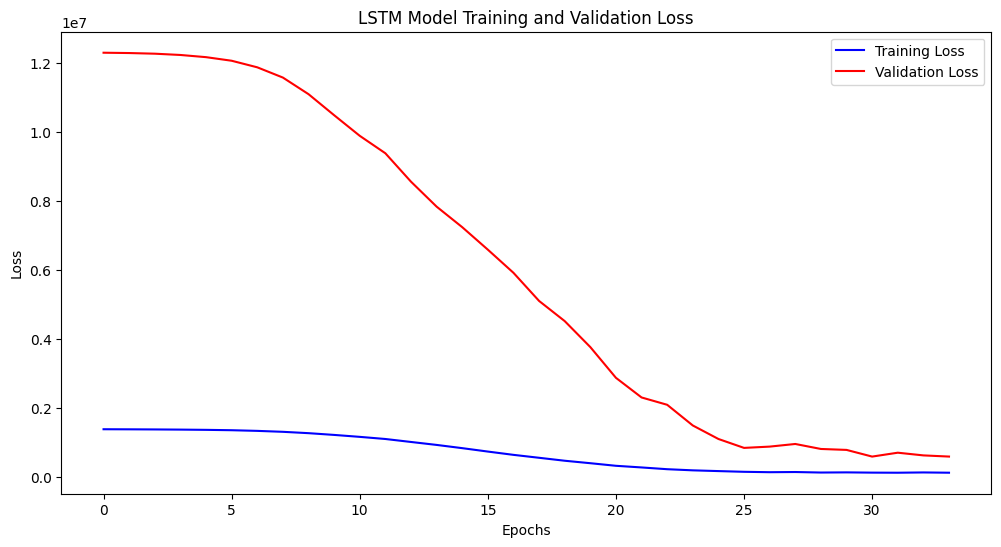

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model creation function
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(10, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(BatchNormalization())  # Add batch normalization
    model.add(Dense(32, activation='relu'))  # Add an additional dense layer
    model.add(Dropout(0.5))  # Add another dropout for regularization
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training with all parameters
lstm_model = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train_lstm, y_train_lstm_prepared, epochs=40, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

lstm_evaluation = lstm_model.evaluate(X_test_lstm, y_test_lstm_prepared)
print(f"LSTM Model Test Loss: {lstm_evaluation}")

lstm_predictions = lstm_model.predict(X_test_lstm)
print("LSTM Model Training and Evaluation Complete.")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss', color='blue')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Convolutional Neural Network (CNN)

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3157212.0000 - val_loss: 1154801.6250
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1161303.6250 - val_loss: 867087.0000
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 813204.3750 - val_loss: 405721.0312
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 307645.4688 - val_loss: 133658.7812
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 137644.3750 - val_loss: 91358.0000
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94802.1719 - val_loss: 61013.6289
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65128.0117 - val_loss: 51249.6016
Epoch 8/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49527.8711 - val_loss: 43311.1797
Epoch 9/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41667.1445 - val_loss: 32683.1133
Epoch 10/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35664.2891 - val_loss: 27221.6094
Epoch 11/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34760.0195 - val_lo

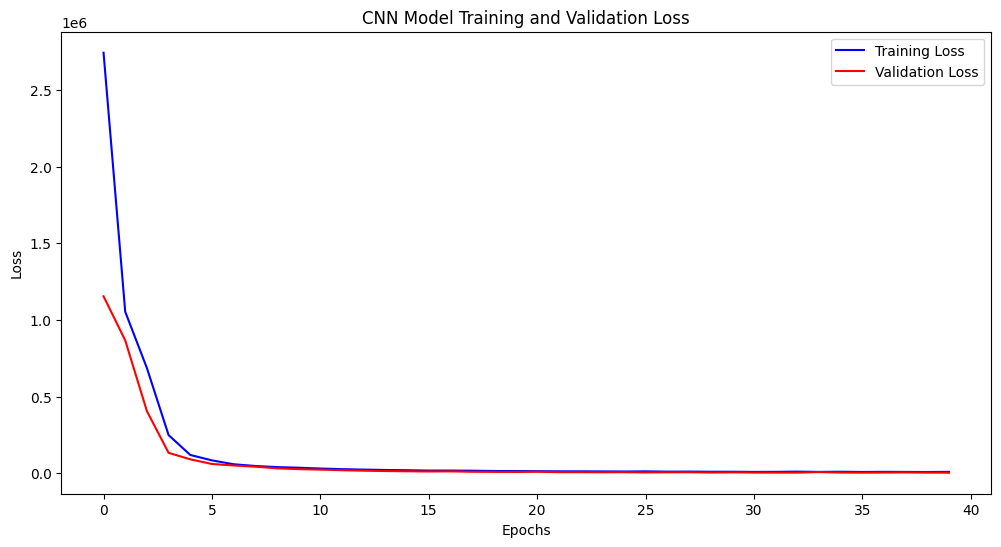

In [21]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the CNN model creation function
def create_cnn_model(input_dim):
    model = Sequential()
    model.add(Reshape((input_dim, 1), input_shape=(input_dim,)))
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.25))  # Dropout layer to reduce overfitting
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training with all parameters
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_model = create_cnn_model(X_train_scaled.shape[1])
cnn_history = cnn_model.fit(X_train_scaled, y_train, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation = cnn_model.evaluate(X_test_scaled, y_test)
print(f"CNN Model Test Loss: {cnn_evaluation}")

cnn_predictions = cnn_model.predict(X_test_scaled)
print("CNN Model Training and Evaluation Complete.")

plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('CNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#
From here trash code

Dave Evaluation of Strategy:
- [ ] Sharpe Ratio -> Verschoben auf nach Strategie Implementation
- [x] In sample, out sample performance
- [x] Information Coefficient


Rafael
- [ ] Use Multiple Sets of Signals

Felix
- [ ] Write shit
- [ ] Hyperparameter Tuning (Optional)

After:
- [ ] Hyperparameter Tuning
- [ ] Data Augmentation


## Backtest and Evaluate the Models

Get the in-sample and out-of-sample R-Squared and MSE


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# In sample predictions
ffnn_train_predictions = ffnn_model.predict(X_train)
lstm_train_predictions = lstm_model.predict(X_train_lstm)
cnn_train_predictions = cnn_model.predict(X_train)

# FFNN performance
ffnn_in_sample_r2 = r2_score(y_train, ffnn_train_predictions)
ffnn_out_sample_r2 = r2_score(y_test, ffnn_predictions)
ffnn_in_sample_mse = mean_squared_error(y_train, ffnn_train_predictions)
ffnn_out_sample_mse = mean_squared_error(y_test, ffnn_predictions)

# LSTM performance
lstm_in_sample_r2 = r2_score(y_train_lstm_prepared, lstm_train_predictions)
lstm_out_sample_r2 = r2_score(y_test_lstm_prepared, lstm_predictions)
lstm_in_sample_mse = mean_squared_error(y_train_lstm_prepared, lstm_train_predictions)
lstm_out_sample_mse = mean_squared_error(y_test_lstm_prepared, lstm_predictions)

# CNN performance
cnn_in_sample_r2 = r2_score(y_train, cnn_train_predictions)
cnn_out_sample_r2 = r2_score(y_test, cnn_predictions)
cnn_in_sample_mse = mean_squared_error(y_train, cnn_train_predictions)
cnn_out_sample_mse = mean_squared_error(y_test, cnn_predictions)

print(f"FFNN In-sample R-squared: {ffnn_in_sample_r2}")
print(f"FFNN In-sample MSE: {ffnn_in_sample_mse}")
print(f"FFNN Out-sample R-squared: {ffnn_out_sample_r2}")
print(f"FFNN Out-sample MSE: {ffnn_out_sample_mse}")
print("---------------------------------------------------")
print(f"LSTM In-sample R-squared: {lstm_in_sample_r2}")
print(f"LSTM In-sample MSE: {lstm_in_sample_mse}")
print(f"LSTM Out-sample R-squared: {lstm_out_sample_r2}")
print(f"LSTM Out-sample MSE: {lstm_out_sample_mse}")
print("---------------------------------------------------")
print(f"CNN In-sample R-squared: {cnn_in_sample_r2}")
print(f"CNN In-sample MSE: {cnn_in_sample_mse}")
print(f"CNN Out-sample R-squared: {cnn_out_sample_r2}")
print(f"CNN Out-sample MSE: {cnn_out_sample_mse}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
FFNN In-sample R-squared: 0.9897175116385531
FFNN In-sample MSE: 13358.054026486696
FFNN Out-sample R-squared: 0.9892030687342444
FFNN Out-sample MSE: 16001.910444849203
---------------------------------------------------
LSTM In-sample R-squared: 0.8842411969203259
LSTM In-sample MSE: 142002.0647532936
LSTM Out-sample R-squared: 0.884440296969389
LSTM Out-sample MSE: 165649.19262702807
---------------------------------------------------
CNN In-sample R-squared: -3.5683928401294382
CNN In-sample MSE: 5934831.747679945
CNN Out-sample R-squared: 0.9950761632159637
CNN Out-sample MSE: 7297.517537515632


The Information Coefficient (IC) measures the correlation between predicted and actual returns.
see: https://www.investopedia.com/terms/i/information-coefficient.asp

In [10]:
import numpy as np

def calculate_proportion_correct(predictions, actuals):
    # Flatten the arrays to 1D
    predictions = predictions.flatten()
    actuals = actuals.flatten()
    
    # Align the lengths by trimming the last element of both arrays if one is longer than the other
    min_length = min(len(predictions), len(actuals))
    predictions = predictions[:min_length]
    actuals = actuals[:min_length]
    
    # Calculate the direction of actual returns and predicted returns
    actual_directions = np.diff(actuals) > 0
    predicted_directions = np.diff(predictions) > 0
    
    # Determine the correct predictions (correct direction)
    correct_predictions = np.where(predicted_directions == actual_directions, 1, 0)
    
    # Calculate the proportion of correct predictions
    proportion_correct = np.mean(correct_predictions)
    
    return proportion_correct

def calculate_ic(proportion_correct):
    return (2 * proportion_correct) - 1

# Calculate proportion correct for FFNN
ffnn_proportion_correct = calculate_proportion_correct(ffnn_predictions, y_test.values)
ffnn_ic_new = calculate_ic(ffnn_proportion_correct)

print(f"FFNN Information Coefficient (new method): {ffnn_ic_new}")
print("---------------------------------------------------")
# Calculate proportion correct for LSTM
lstm_proportion_correct = calculate_proportion_correct(lstm_predictions, y_test_lstm_prepared)
lstm_ic_new = calculate_ic(lstm_proportion_correct)
print(f"LSTM Information Coefficient (new method): {lstm_ic_new}")
print("---------------------------------------------------")
cnn_proportion_correct = calculate_proportion_correct(cnn_predictions, y_test.values)
cnn_ic_new = calculate_ic(cnn_proportion_correct)
print(f"CNN Information Coefficient (new method): {cnn_ic_new}")


FFNN Information Coefficient (new method): 0.9042553191489362
---------------------------------------------------
LSTM Information Coefficient (new method): 0.19220055710306405
---------------------------------------------------
CNN Information Coefficient (new method): 0.9414893617021276


Sharpe Ratio Calculation:
Still To Do


### Show and Discuss Results
We will create charts to visualize the actual vs. predicted values for each model and discuss the results.

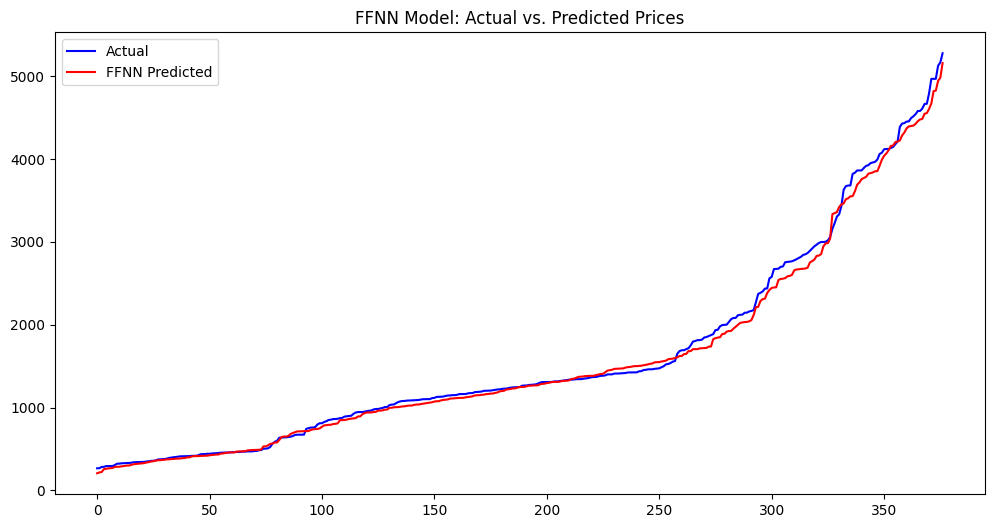

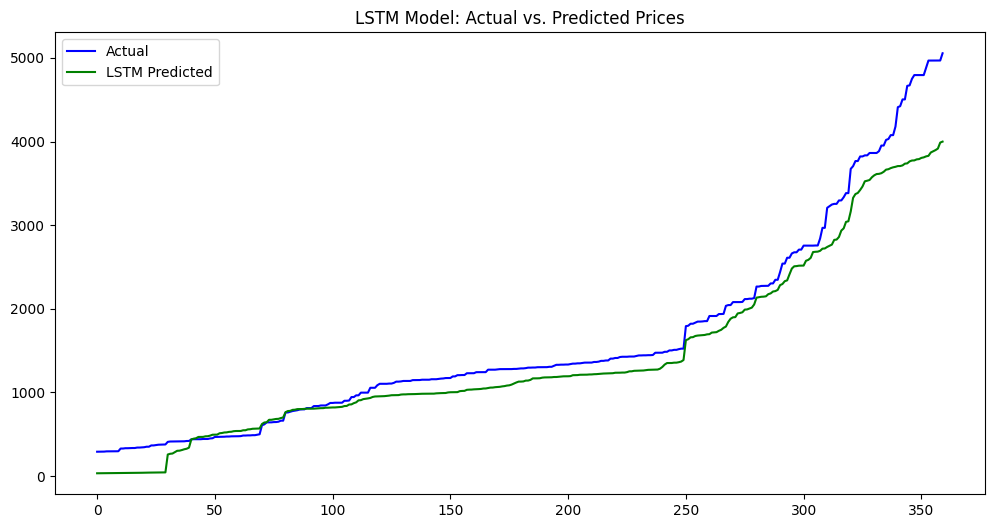

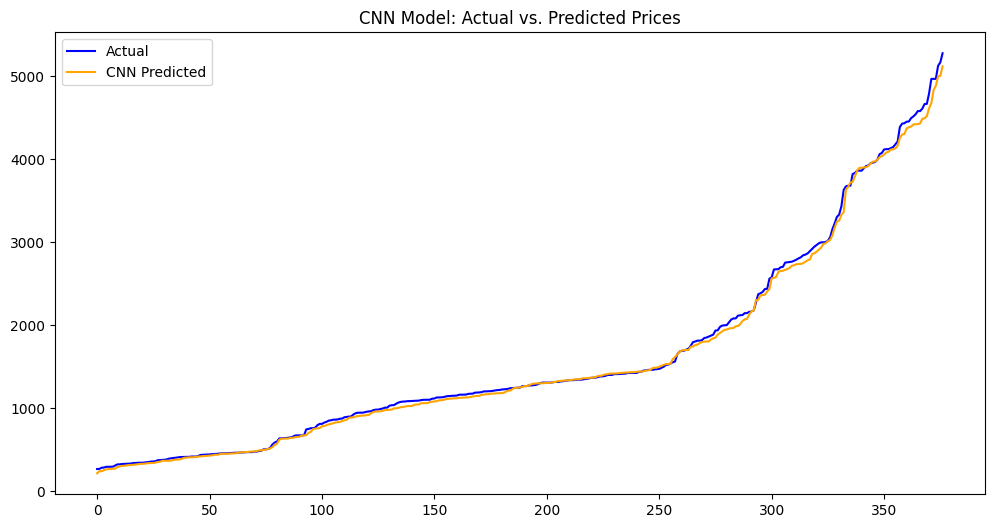

In [11]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for FFNN
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test.values), label='Actual', color='blue')
plt.plot(sorted(ffnn_predictions.flatten()), label='FFNN Predicted', color='red')
plt.title('FFNN Model: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Plot actual vs. predicted values for LSTM
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test_lstm_prepared), label='Actual', color='blue')
plt.plot(sorted(lstm_predictions.flatten()), label='LSTM Predicted', color='green')
plt.title('LSTM Model: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Plot actual vs. predicted values for CNN
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test.values), label='Actual', color='blue')
plt.plot(sorted(cnn_predictions.flatten()), label='CNN Predicted', color='orange')
plt.title('CNN Model: Actual vs. Predicted Prices')
plt.legend()
plt.show()


# DAVE TILL HERE

# RAFAEL FROM HERE

### Step 3: Use Multiple Sets of Signals
We will evaluate the models using two sets of signals:

Set 1: Macroeconomic Signals:

GDP: Gross Domestic Product growth.
CPI: Inflation rate.
UN: Unemployment rate.
IR: Nominal interest rate.
Y10: 10Y treasury yield.
Economic Motivation: These indicators are fundamental to the overall economic environment and can significantly influence stock market movements. Changes in GDP, inflation, and interest rates are closely monitored by investors.

Set 2: Market and Technical Signals:

PE: Price/Earnings ratio.
DY: Dividend yield.
_MKT: Market returns.
_VA: Value index.
_GR: Growth index.
Economic Motivation: These indicators provide insight into market valuation and performance. They help understand the relative attractiveness of stocks and the broader market trends.

We will re-train and evaluate the models using these sets of signals.

## FFNN

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3679969.7500 - val_loss: 3819349.5000
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3660890.5000 - val_loss: 3767351.7500
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3747214.2500 - val_loss: 3615523.5000
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3359796.0000 - val_loss: 3302947.7500
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3028561.5000 - val_loss: 2834518.0000
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2697362.2500 - val_loss: 2334247.5000
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2075529.2500 - val_loss: 1939479.8750
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1813848.5000 - val_loss: 1716572.2500
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1761613.6250 - val_loss: 1603643.3750
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1557339.0000 - val_loss: 1533077.8750
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

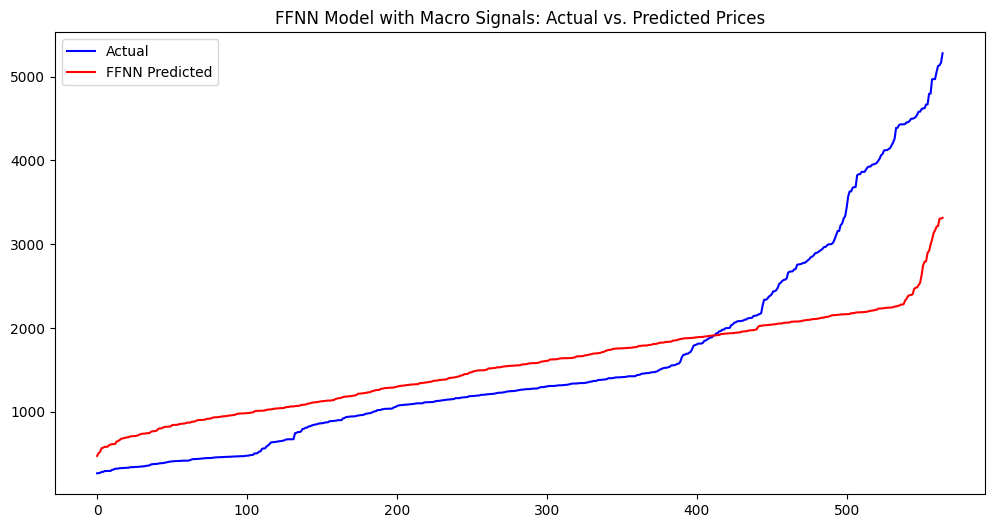

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3834755.7500 - val_loss: 3820832.5000
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3741884.5000 - val_loss: 3763941.2500
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3560646.7500 - val_loss: 3578256.7500
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3113994.7500 - val_loss: 3201291.2500
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2856719.2500 - val_loss: 2641874.2500
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2379797.2500 - val_loss: 1978759.6250
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1702333.1250 - val_loss: 1343557.8750
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1348187.5000 - val_loss: 868167.7500
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 778863.4375 - val_loss: 593047.8125
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 621544.3125 - val_loss: 454063.2500
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

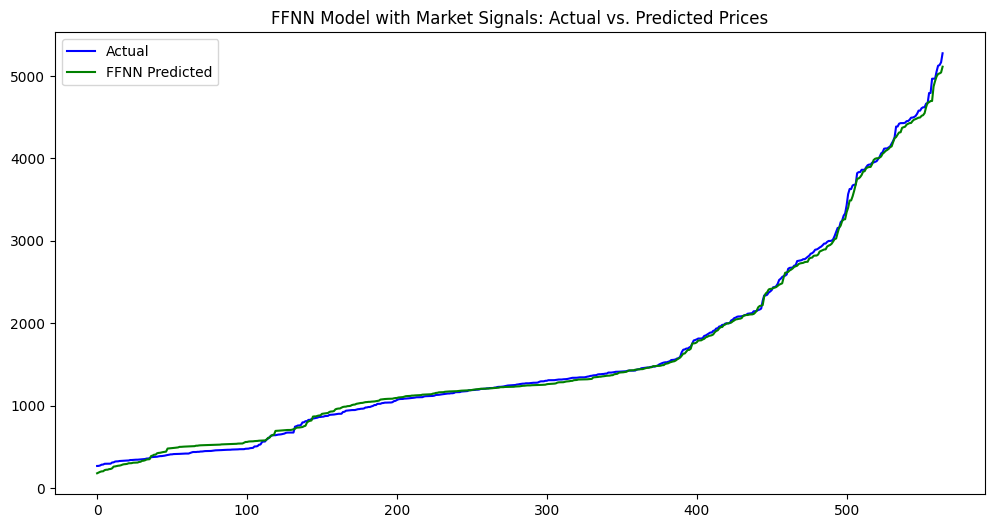

In [12]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10']

# Filter data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

X_train_macro, X_test_macro, y_train_macro, y_test_macro = train_test_split(features_macro_scaled, target_macro, test_size=0.3, random_state=42)

ffnn_model_macro = create_ffnn_model(X_train_macro.shape[1])
ffnn_history_macro = ffnn_model_macro.fit(X_train_macro, y_train_macro, epochs=40, batch_size=16, validation_split=0.2, verbose=1)

ffnn_evaluation_macro = ffnn_model_macro.evaluate(X_test_macro, y_test_macro)
print(f"FFNN Model with Macro Signals Test Loss: {ffnn_evaluation_macro}")

ffnn_macro_predictions = ffnn_model_macro.predict(X_test_macro)
ffnn_macro_mse = mean_squared_error(sorted(y_test_macro), ffnn_macro_predictions)
ffnn_macro_r2 = r2_score(sorted(y_test_macro), ffnn_macro_predictions)
print(f"FFNN with Macro Signals MSE: {ffnn_macro_mse}")
print(f"FFNN with Macro Signals R-squared: {ffnn_macro_r2}")

plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test_macro.values), label='Actual', color='blue')
plt.plot(sorted(ffnn_macro_predictions.flatten()), label='FFNN Predicted', color='red')
plt.title('FFNN Model with Macro Signals: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr']

# Filter data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

X_train_market, X_test_market, y_train_market, y_test_market = train_test_split(features_market_scaled, target_market, test_size=0.3, random_state=42)

ffnn_model_market = create_ffnn_model(X_train_market.shape[1])
ffnn_history_market = ffnn_model_market.fit(X_train_market, y_train_market, epochs=40, batch_size=16, validation_split=0.2, verbose=1)

ffnn_evaluation_market = ffnn_model_market.evaluate(X_test_market, y_test_market)
print(f"FFNN Model with Market Signals Test Loss: {ffnn_evaluation_market}")

ffnn_market_predictions = ffnn_model_market.predict(X_test_market)
ffnn_market_mse = mean_squared_error(sorted(y_test_market), ffnn_market_predictions)
ffnn_market_r2 = r2_score(sorted(y_test_market), ffnn_market_predictions)
print(f"FFNN with Market Signals MSE: {ffnn_market_mse}")
print(f"FFNN with Market Signals R-squared: {ffnn_market_r2}")

plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test_market.values), label='Actual', color='blue')
plt.plot(sorted(ffnn_market_predictions.flatten()), label='FFNN Predicted', color='green')
plt.title('FFNN Model with Market Signals: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# LSTM

Epoch 1/100


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1495203.6250 - val_loss: 12302851.0000
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1369272.1250 - val_loss: 12299048.0000
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1398516.2500 - val_loss: 12291810.0000
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1397510.2500 - val_loss: 12278627.0000
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1375724.0000 - val_loss: 12255519.0000
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1357309.2500 - val_loss: 12216361.0000
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1384342.5000 - val_loss: 12152077.0000
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1252039.7500 - val_loss: 12056652.0000
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1344955.1250 - val_loss: 11918658.0000
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1290063.7500 - val_loss: 11745305.0000
Epoch 11/100
38/38 ━━━━━━━━━━━━

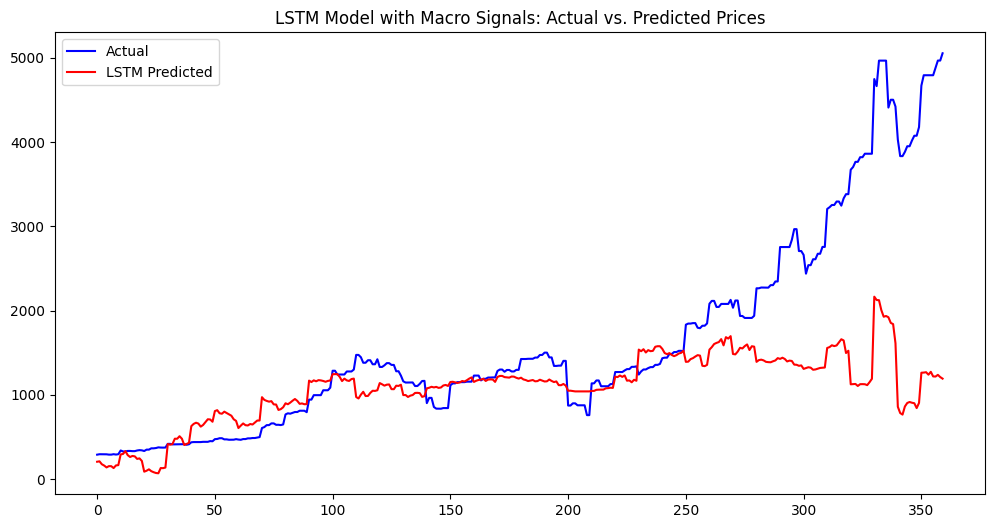

Epoch 1/100


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1370880.0000 - val_loss: 12303728.0000
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1380315.3750 - val_loss: 12300882.0000
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1339811.7500 - val_loss: 12294245.0000
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1421367.3750 - val_loss: 12279660.0000
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1412263.5000 - val_loss: 12250567.0000
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1327668.0000 - val_loss: 12198275.0000
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1360256.8750 - val_loss: 12104410.0000
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1360640.2500 - val_loss: 11949021.0000
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1314893.3750 - val_loss: 11711607.0000
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1278799.8750 - val_loss: 11362650.0000
Epoch 11/100
38/38 ━━━━━━━━━━━━

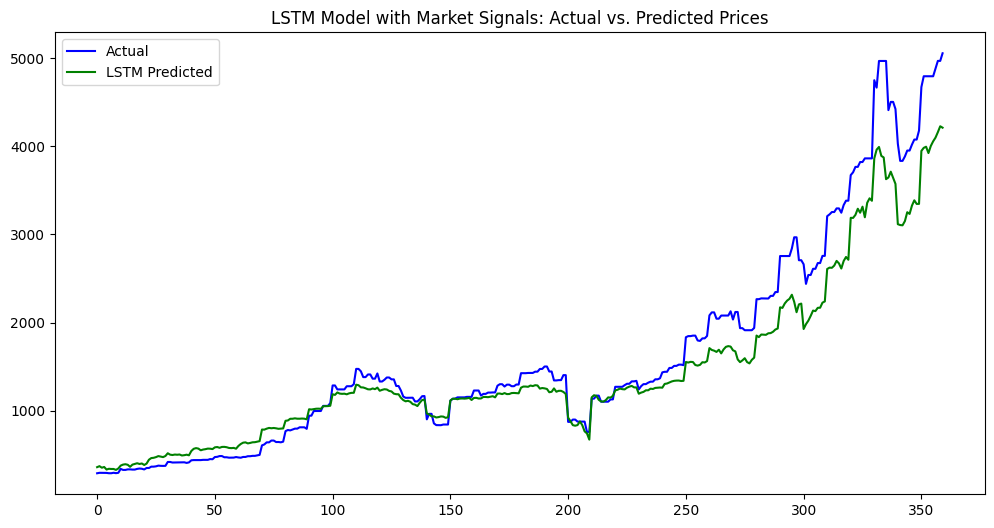

In [13]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10']

# Filter and reshape data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

# Split the data using the custom function
X_train_macro_prepared, y_train_macro_prepared, X_test_macro_prepared, y_test_macro_prepared = custom_train_test_split(features_macro_scaled, target_macro)

# Reshape data for LSTM (needs 3D input)
X_train_macro_lstm = X_train_macro_prepared.reshape((X_train_macro_prepared.shape[0], 1, X_train_macro_prepared.shape[1]))
X_test_macro_lstm = X_test_macro_prepared.reshape((X_test_macro_prepared.shape[0], 1, X_test_macro_prepared.shape[1]))

lstm_model_macro = create_lstm_model((X_train_macro_lstm.shape[1], X_train_macro_lstm.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Increased patience
lstm_history_macro = lstm_model_macro.fit(X_train_macro_lstm, y_train_macro_prepared, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])  # Increased epochs

lstm_evaluation_macro = lstm_model_macro.evaluate(X_test_macro_lstm, y_test_macro_prepared)
print(f"LSTM Model with Macro Signals Test Loss: {lstm_evaluation_macro}")

lstm_macro_predictions = lstm_model_macro.predict(X_test_macro_lstm)
lstm_macro_mse = mean_squared_error(y_test_macro_prepared, lstm_macro_predictions)
lstm_macro_r2 = r2_score(y_test_macro_prepared, lstm_macro_predictions)
print(f"LSTM with Macro Signals MSE: {lstm_macro_mse}")
print(f"LSTM with Macro Signals R-squared: {lstm_macro_r2}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_macro_prepared, label='Actual', color='blue')
plt.plot(lstm_macro_predictions.flatten(), label='LSTM Predicted', color='red')
plt.title('LSTM Model with Macro Signals: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr']

# Filter and reshape data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

# Split the data using the custom function
X_train_market_prepared, y_train_market_prepared, X_test_market_prepared, y_test_market_prepared = custom_train_test_split(features_market_scaled, target_market)

# Reshape data for LSTM (needs 3D input)
X_train_market_lstm = X_train_market_prepared.reshape((X_train_market_prepared.shape[0], 1, X_train_market_prepared.shape[1]))
X_test_market_lstm = X_test_market_prepared.reshape((X_test_market_prepared.shape[0], 1, X_test_market_prepared.shape[1]))

lstm_model_market = create_lstm_model((X_train_market_lstm.shape[1], X_train_market_lstm.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Increased patience
lstm_history_market = lstm_model_market.fit(X_train_market_lstm, y_train_market_prepared, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])  # Increased epochs

lstm_evaluation_market = lstm_model_market.evaluate(X_test_market_lstm, y_test_market_prepared)
print(f"LSTM Model with Market Signals Test Loss: {lstm_evaluation_market}")

lstm_market_predictions = lstm_model_market.predict(X_test_market_lstm)
lstm_market_mse = mean_squared_error(y_test_market_prepared, lstm_market_predictions)
lstm_market_r2 = r2_score(y_test_market_prepared, lstm_market_predictions)
print(f"LSTM with Market Signals MSE: {lstm_market_mse}")
print(f"LSTM with Market Signals R-squared: {lstm_market_r2}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_market_prepared, label='Actual', color='blue')
plt.plot(lstm_market_predictions.flatten(), label='LSTM Predicted', color='green')
plt.title('LSTM Model with Market Signals: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# CNN

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3786719.5000 - val_loss: 3410723.0000
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2588655.0000 - val_loss: 1409422.8750
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1517416.8750 - val_loss: 1341811.5000
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1545960.2500 - val_loss: 1311532.7500
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1438841.8750 - val_loss: 1282530.5000
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1321041.2500 - val_loss: 1225915.6250
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1258065.3750 - val_loss: 1203264.6250
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1304513.6250 - val_loss: 1166471.1250
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1255784.6250 - val_loss: 1147866.1250
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1283906.3750 - val_loss: 1111969.3750
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

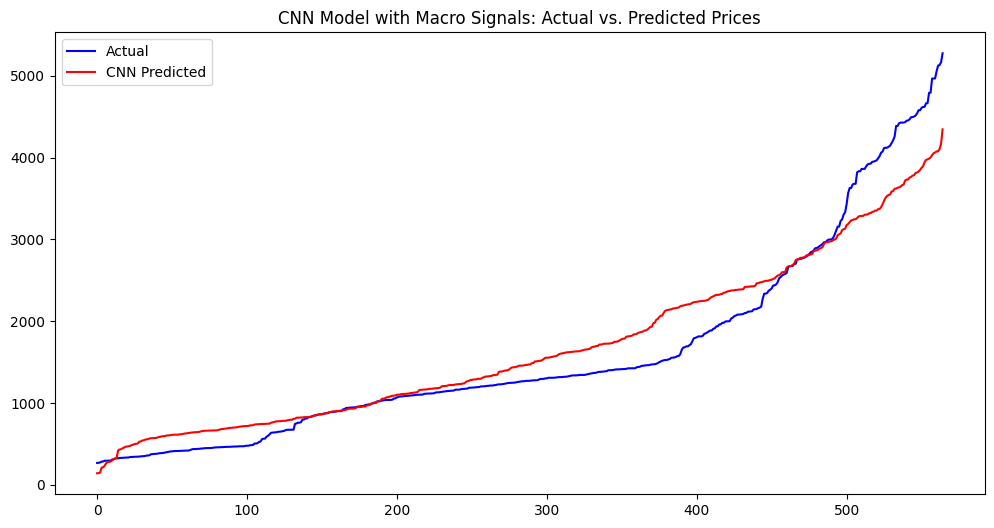

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3442189.2500 - val_loss: 3458787.5000
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2555969.7500 - val_loss: 634054.4375
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 659292.6250 - val_loss: 470994.2188
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 475324.2188 - val_loss: 281888.3438
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299399.9688 - val_loss: 125123.5000
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127951.8203 - val_loss: 42561.7734
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43236.3125 - val_loss: 24151.0137
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27571.7129 - val_loss: 21290.1270
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26150.5996 - val_loss: 17876.4238
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25598.2656 - val_loss: 15471.4902
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20374.7734 - val_

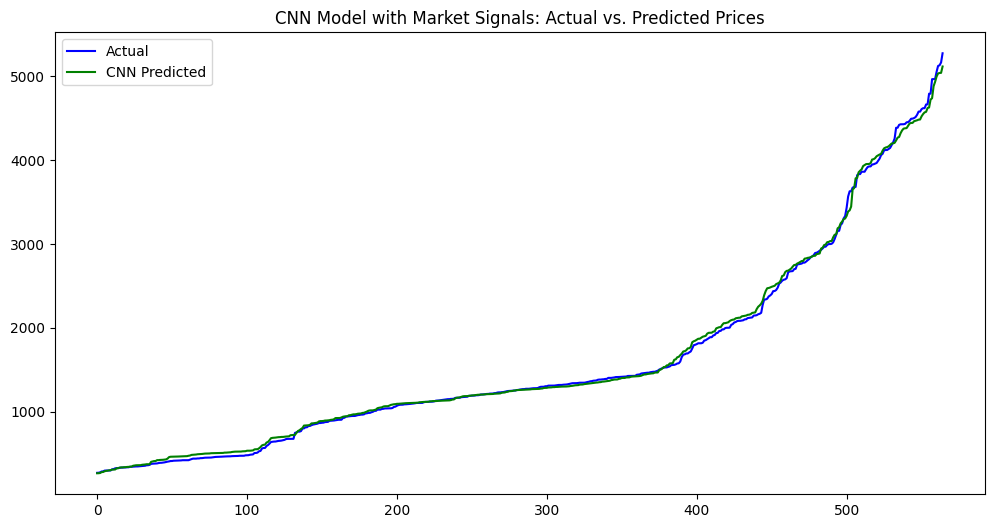

In [14]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10']

# Filter data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

X_train_macro, X_test_macro, y_train_macro, y_test_macro = train_test_split(features_macro_scaled, target_macro, test_size=0.3, random_state=42)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model_macro = create_cnn_model(X_train_macro.shape[1])
cnn_history_macro = cnn_model_macro.fit(X_train_macro, y_train_macro, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation_macro = cnn_model_macro.evaluate(X_test_macro, y_test_macro)
print(f"CNN Model with Macro Signals Test Loss: {cnn_evaluation_macro}")

cnn_macro_predictions = cnn_model_macro.predict(X_test_macro)
cnn_macro_mse = mean_squared_error(sorted(y_test_macro), cnn_macro_predictions)
cnn_macro_r2 = r2_score(sorted(y_test_macro), cnn_macro_predictions)
print(f"CNN with Macro Signals MSE: {cnn_macro_mse}")
print(f"CNN with Macro Signals R-squared: {cnn_macro_r2}")

plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test_macro.values), label='Actual', color='blue')
plt.plot(sorted(cnn_macro_predictions.flatten()), label='CNN Predicted', color='red')
plt.title('CNN Model with Macro Signals: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr']

# Filter data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

X_train_market, X_test_market, y_train_market, y_test_market = train_test_split(features_market_scaled, target_market, test_size=0.3, random_state=42)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model_market = create_cnn_model(X_train_market.shape[1])
cnn_history_market = cnn_model_market.fit(X_train_market, y_train_market, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation_market = cnn_model_market.evaluate(X_test_market, y_test_market)
print(f"CNN Model with Market Signals Test Loss: {cnn_evaluation_market}")

cnn_market_predictions = cnn_model_market.predict(X_test_market)
cnn_market_mse = mean_squared_error(sorted(y_test_market), cnn_market_predictions)
cnn_market_r2 = r2_score(sorted(y_test_market), cnn_market_predictions)
print(f"CNN with Market Signals MSE: {cnn_market_mse}")
print(f"CNN with Market Signals R-squared: {cnn_market_r2}")

plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test_market.values), label='Actual', color='blue')
plt.plot(sorted(cnn_market_predictions.flatten()), label='CNN Predicted', color='green')
plt.title('CNN Model with Market Signals: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# DAVE AB HIER WIEDER

### Step 4: In-sample and Out-of-sample Performance
In-sample Predictions and Plotting:

Evaluate the in-sample performance using training data.
Compare the in-sample predictions to the actual values.
Plot the actual vs. predicted values for in-sample data.

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
FFNN In-sample MSE: 3568.6725408579414
FFNN In-sample R-squared: 0.9972529805767796


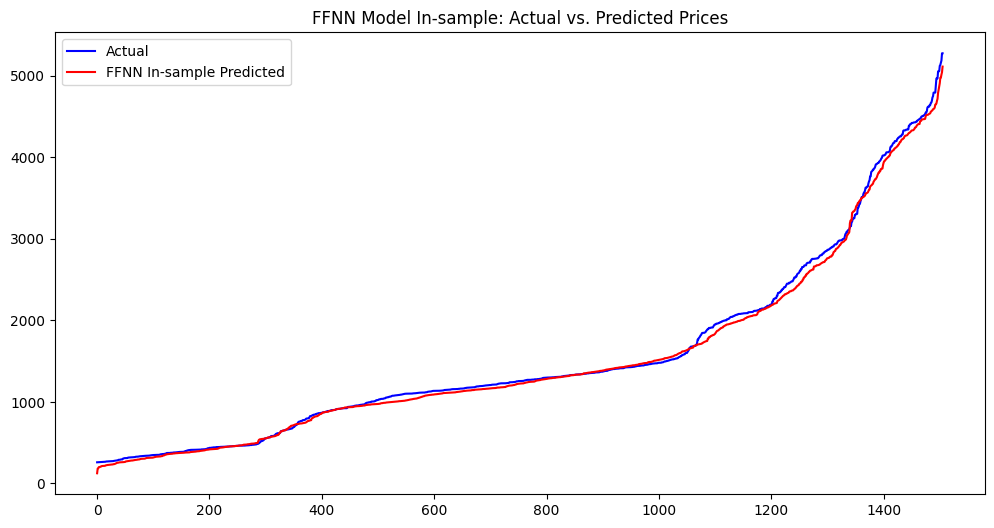

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
LSTM In-sample MSE: 83833.98175199152
LSTM In-sample R-squared: 0.9316592938146789


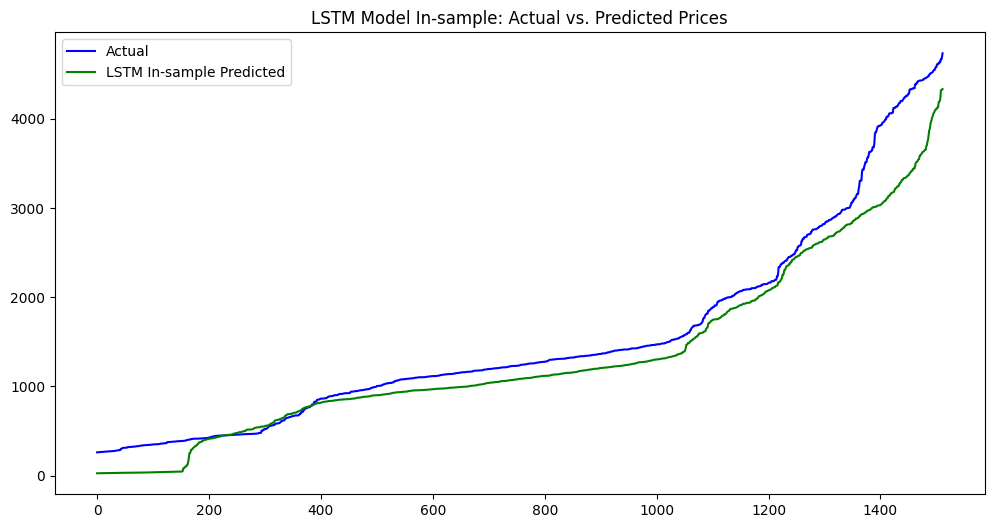

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN In-sample MSE: 5859375.037232811
CNN In-sample R-squared: -3.5103093239655356


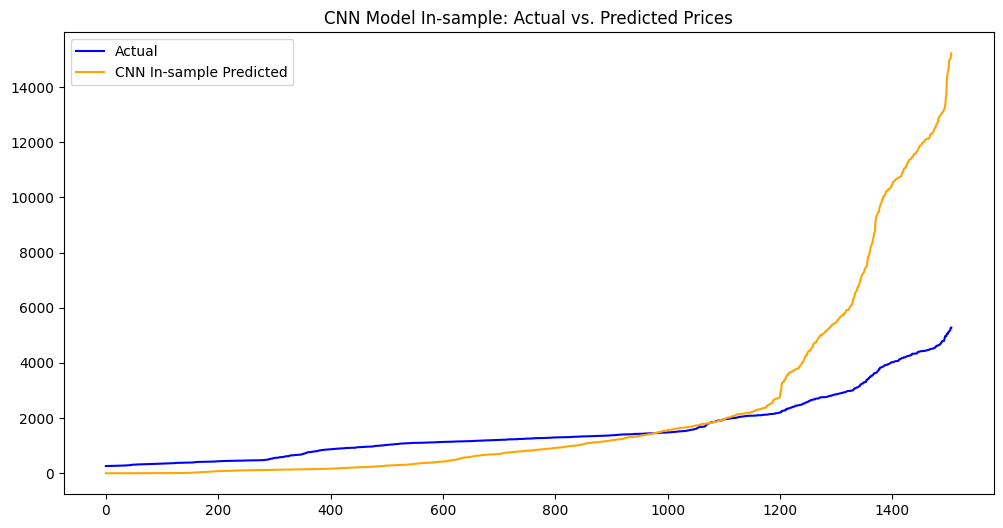

In [15]:
# In-sample predictions for FFNN
ffnn_in_sample_predictions = ffnn_model.predict(X_train)
ffnn_in_sample_mse = mean_squared_error(sorted(y_train), sorted(ffnn_in_sample_predictions))
ffnn_in_sample_r2 = r2_score(sorted(y_train), sorted(ffnn_in_sample_predictions))
print(f"FFNN In-sample MSE: {ffnn_in_sample_mse}")
print(f"FFNN In-sample R-squared: {ffnn_in_sample_r2}")

# Plot actual vs. predicted values for in-sample data (FFNN)
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_train.values), label='Actual', color='blue')
plt.plot(sorted(ffnn_in_sample_predictions.flatten()), label='FFNN In-sample Predicted', color='red')
plt.title('FFNN Model In-sample: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# In-sample predictions for LSTM
lstm_in_sample_predictions = lstm_model.predict(X_train_lstm)
lstm_in_sample_mse = mean_squared_error(sorted(y_train_lstm_prepared), sorted(lstm_in_sample_predictions))
lstm_in_sample_r2 = r2_score(sorted(y_train_lstm_prepared), sorted(lstm_in_sample_predictions))
print(f"LSTM In-sample MSE: {lstm_in_sample_mse}")
print(f"LSTM In-sample R-squared: {lstm_in_sample_r2}")

# Plot actual vs. predicted values for in-sample data (LSTM)
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_train_lstm_prepared), label='Actual', color='blue')
plt.plot(sorted(lstm_in_sample_predictions.flatten()), label='LSTM In-sample Predicted', color='green')
plt.title('LSTM Model In-sample: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# In-sample predictions for CNN
cnn_in_sample_predictions = cnn_model.predict(X_train)
cnn_in_sample_mse = mean_squared_error(sorted(y_train), sorted(cnn_in_sample_predictions))
cnn_in_sample_r2 = r2_score(sorted(y_train), sorted(cnn_in_sample_predictions))
print(f"CNN In-sample MSE: {cnn_in_sample_mse}")
print(f"CNN In-sample R-squared: {cnn_in_sample_r2}")

# Plot actual vs. predicted values for in-sample data (CNN)
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_train.values), label='Actual', color='blue')
plt.plot(sorted(cnn_in_sample_predictions.flatten()), label='CNN In-sample Predicted', color='orange')
plt.title('CNN Model In-sample: Actual vs. Predicted Prices')
plt.legend()
plt.show()


Out-of-sample Predictions and Plotting:

Evaluate the out-of-sample performance using testing data (already calculated).
Compare the out-of-sample predictions to the actual values.
Plot the actual vs. predicted values for out-of-sample data.

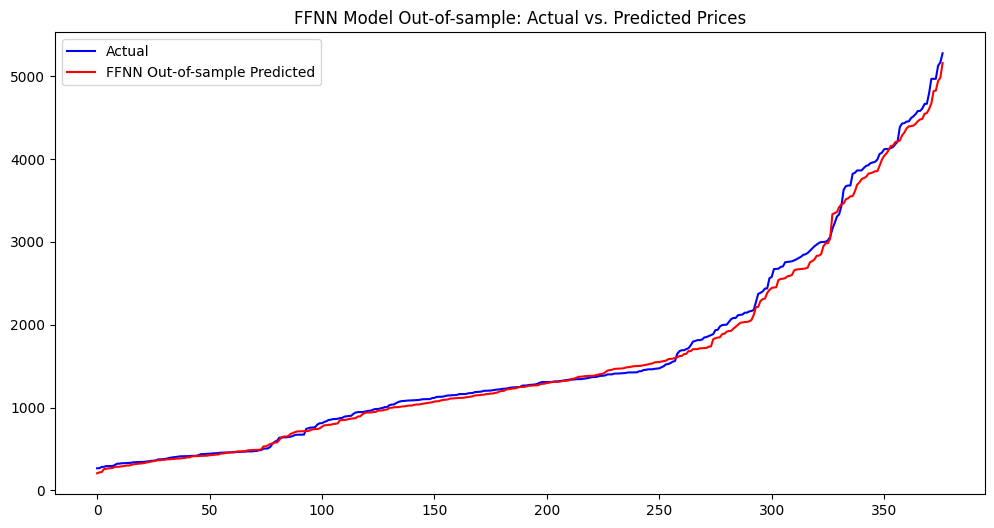

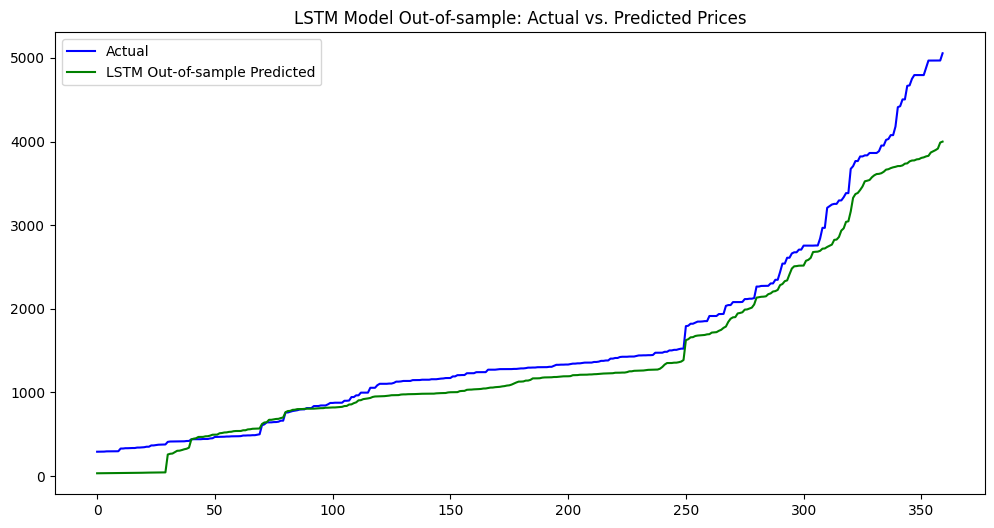

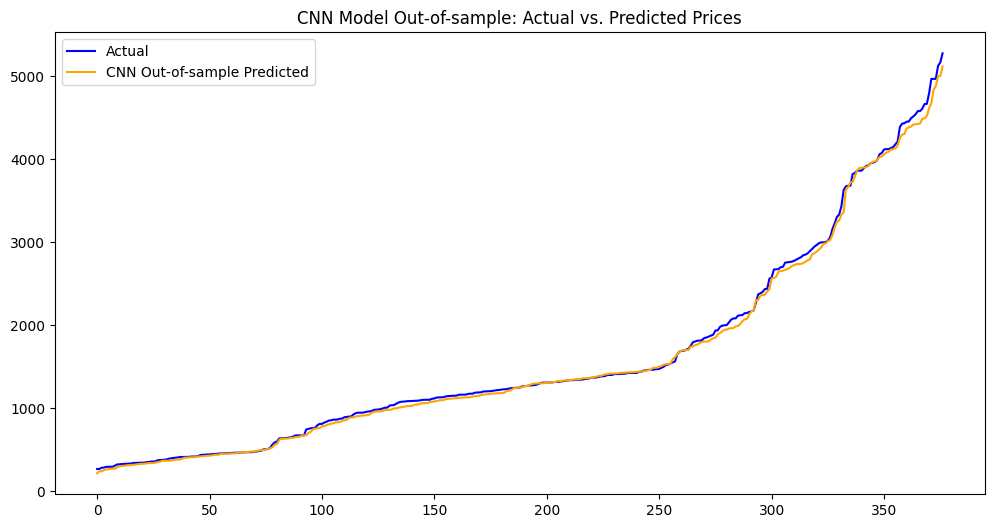

In [16]:
# Out-of-sample predictions for FFNN
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test.values), label='Actual', color='blue')
plt.plot(sorted(ffnn_predictions.flatten()), label='FFNN Out-of-sample Predicted', color='red')
plt.title('FFNN Model Out-of-sample: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Out-of-sample predictions for LSTM
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test_lstm_prepared), label='Actual', color='blue')
plt.plot(sorted(lstm_predictions.flatten()), label='LSTM Out-of-sample Predicted', color='green')
plt.title('LSTM Model Out-of-sample: Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Out-of-sample predictions for CNN
plt.figure(figsize=(12, 6))
plt.plot(sorted(y_test.values), label='Actual', color='blue')
plt.plot(sorted(cnn_predictions.flatten()), label='CNN Out-of-sample Predicted', color='orange')
plt.title('CNN Model Out-of-sample: Actual vs. Predicted Prices')
plt.legend()
plt.show()

### Step 5: Analyze Hypotheses and Results
We will form hypotheses based on our two sets of signals and compare the results to these expectations.

Hypotheses:

Macroeconomic Signals:

Hypothesis: Macroeconomic indicators such as GDP, CPI, and interest rates significantly influence the S&P 500 movements, and models using these signals will have strong predictive power.
Expected Results: Higher R-squared values and lower MSE for models trained with macroeconomic signals compared to other signals.
Market and Technical Signals:

Hypothesis: Market and technical indicators, such as P/E ratio, dividend yield, and market returns, provide a closer insight into stock market valuation and performance. These signals should lead to better short-term predictive performance.
Expected Results: More accurate short-term predictions reflected in tighter alignment of actual vs. predicted values.
Evaluate and Discuss Results:

Compare the in-sample and out-of-sample performance of models using different sets of signals.
Discuss whether the results support the initial hypotheses.

In [17]:
# Evaluate FFNN with macro signals
ffnn_macro_predictions = ffnn_model_macro.predict(X_test_macro)
ffnn_macro_mse = mean_squared_error(y_test_macro, ffnn_macro_predictions)
ffnn_macro_r2 = r2_score(y_test_macro, ffnn_macro_predictions)
print(f"FFNN with Macro Signals MSE: {ffnn_macro_mse}")
print(f"FFNN with Macro Signals R-squared: {ffnn_macro_r2}")

# Evaluate FFNN with market signals
ffnn_market_predictions = ffnn_model_market.predict(X_test_market)
ffnn_market_mse = mean_squared_error(y_test_market, ffnn_market_predictions)
ffnn_market_r2 = r2_score(y_test_market, ffnn_market_predictions)
print(f"FFNN with Market Signals MSE: {ffnn_market_mse}")
print(f"FFNN with Market Signals R-squared: {ffnn_market_r2}")

# Compare in-sample and out-of-sample performance
print(f"In-sample R-squared: {ffnn_in_sample_r2}")
print(f"Out-of-sample R-squared: {ffnn_r2}")

# Discuss whether the results support the initial hypotheses
if ffnn_macro_r2 > ffnn_market_r2:
    print("Macroeconomic signals provided better predictive power.")
else:
    print("Market and technical signals provided better predictive power.")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
FFNN with Macro Signals MSE: 799978.6389497068
FFNN with Macro Signals R-squared: 0.437322514518249
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
FFNN with Market Signals MSE: 11404.671784453894
FFNN with Market Signals R-squared: 0.9919783457582739
In-sample R-squared: 0.9972529805767796


NameError: name 'ffnn_r2' is not defined

### Summary
Calculated Model Accuracy: We used MSE and R-squared to evaluate model performance.
Visualized Results: Plotted actual vs. predicted values for both in-sample and out-of-sample data.
Used Multiple Signal Sets: Evaluated models with macroeconomic and market/technical signals, providing economic motivation.
Analyzed Hypotheses: Formulated and tested hypotheses based on signal sets and discussed the results.
This comprehensive approach ensures we have a detailed analysis and understanding of the performance of our trading algorithm. If you need any further details or additional steps, please let me know!